# Initial bad prediction

## Import needed bibs

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Exchange null values with mean

In [25]:
df = pd.read_csv('./../../../timeseries/combined/combined_timeseries_final.csv')

In [26]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imputed.columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed['Timestamp'] = df['Timestamp']  # Timestamp (oder andere nicht-numerische Spalten) hinzufügen, falls benötigt

# Feature Selection

#### Select only features you want

In [23]:
X = df_imputed[['cpu_pod-pod-11', 'cpu_system', 'memory', 'network_outgoing_system', 'Requests je Sekunde']]
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

#### Select all features but the feature to be predicted

In [27]:
X = df_imputed.drop(['Durchschnittliche Antwortzeitintervalle', 'Requests je Sekunde', 'Timestamp'], axis=1)
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

In [28]:
X.head(5)

,i_o_read,i_o_write,memory,network_outgoing_pod-pod-1,network_outgoing_pod-pod-2,network_outgoing_pod-pod-3,network_outgoing_pod-pod-4,network_outgoing_pod-pod-5,network_outgoing_pod-pod-6,network_outgoing_pod-pod-7,...,pod-restart-count-pod-16,pod-restart-count-pod-17,pod-restart-count-pod-18,pod-restart-count-pod-19,pod-restart-count-pod-20,pod-restart-count-pod-21,pod-restart-count-pod-22,pod-restart-count-pod-23,pod-restart-count-pod-24,pod-restart-count-pod-25
0,0.0,0.0,1.128975e+10,111.0,139.0,178.0,153.0,322.0,1001.0,4581.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.128867e+10,110.0,139.0,177.0,153.0,322.0,1001.0,4548.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.128932e+10,110.0,139.0,177.0,197.0,320.0,1001.0,4516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.129266e+10,110.0,139.0,177.0,203.0,314.0,2466.0,4483.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.129897e+10,110.0,134.0,177.0,203.0,314.0,2466.0,4451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modell trainieren und auswählen

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, bootstrap=True, max_features=1.0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features=0.8,
                      n_estimators=150, random_state=42)

## Decision Tree Regressor

In [7]:
# Trainieren des Modells
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

## Linear Regression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 482351.8886556827


In [31]:
comparison_df = pd.DataFrame({'Tatsächliche Werte': y_test, 'Vorhersagewerte': y_pred})
# Zurücksetzen des Index, um die Zeilennummerierung zu vereinfachen
comparison_df.reset_index(drop=True, inplace=True)

print(comparison_df)

# Optional: Berechnung und Ausgabe des Mean Squared Error zur Bewertung
print("MSE:", mean_squared_error(y_test, y_pred))

      Tatsächliche Werte  Vorhersagewerte
0             177.000000       159.745334
1             169.000000       223.761217
2             955.229885       602.551995
3             110.000000       117.762134
4             104.302326       204.518777
...                  ...              ...
1148          605.472222       997.181034
1149          341.276923       290.304200
1150         1993.364238      2013.444918
1151          110.018868       172.772224
1152          833.504132       798.810030

[1153 rows x 2 columns]
MSE: 482351.8886556827


## Plot to show residuals

IndexError: index 2771 is out of bounds for axis 0 with size 1153

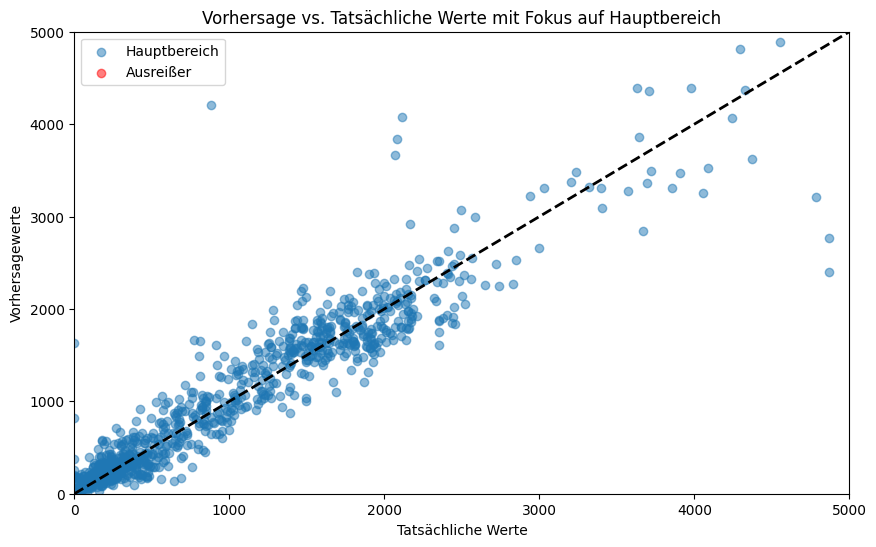

In [32]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 5000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Optional: Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen
plt.ylim(0, hauptbereich_max)

# Anpassen der x-Achse, falls gewünscht
plt.xlim(0, hauptbereich_max)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Optional: Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Plot with outliers

IndexError: index 2788 is out of bounds for axis 0 with size 1153

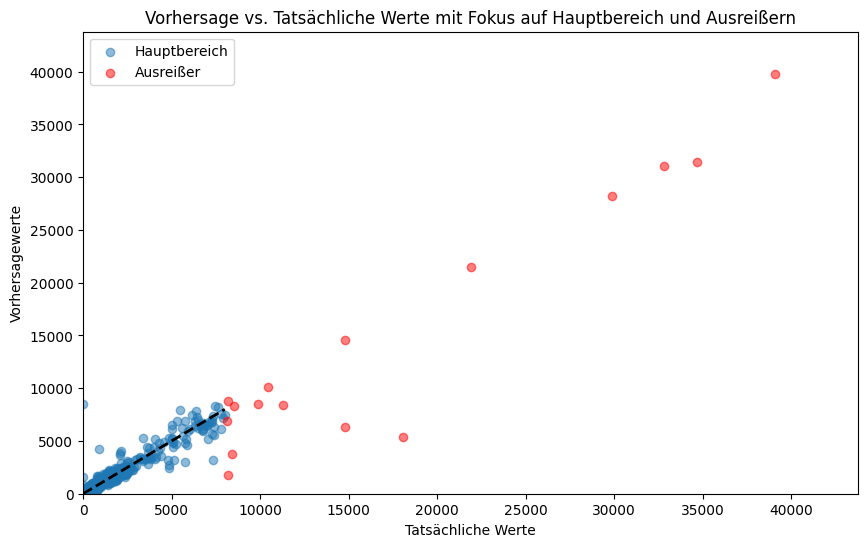

In [33]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 8000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.ylim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

# Anpassen der x-Achse, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.xlim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich und Ausreißern')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Show r2 Score

In [34]:
r2 = r2_score(y_test, y_pred)
print("R²-Score:", r2)

R²-Score: 0.9334825790947938
